In [2]:
# Importamos las librerías necesarias para el análisis de datos, procesamiento de texto, visualización y técnicas de aprendizaje automático.
from __future__ import absolute_import, division, print_function

import re
import string 

import numpy as np
import pandas as pd

import seaborn as sns
import nltk
import hdbscan

from joblib import Memory
from unidecode import unidecode
from nltk.corpus import stopwords
from sklearn.datasets import make_blobs
from textblob import TextBlob

import gensim.models.word2vec as w2v
import matplotlib.pyplot as plt


In [3]:
# Descargamos los recursos necesarios de NLTK, específicamente las stopwords en español. 
nltk.download("stopwords")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sarya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# Ruta del archivo CSV local
ruta_csv = "PARTIDAA.csv"

# Cargamos los datos, almacenandolo en un DataFrame de Pandas
data = pd.read_csv(ruta_csv, encoding="latin1")

In [5]:
palabras_a_eliminar = ['mas', 'si', 'tan', 'habia','asi', 'vez', 'y', 'h', 'mismo', 'aunque', 'mientras', 'que', 'aun', 'seras', 'cualquier', 'misma', 'mmpppfff', 'rurik', 'jum', 'wilfrick', 'wilfrick', 'jeet', 'julgram', 'thrommel',  'beran', 'dennek', 'caranthir', 'groak', 'hacia', 'jimblecap', 'gulgram', 'orsik', 'soren', 'ay', 'grit', 'tambien', 'groac'] 

In [6]:
data["Texto"] = data["Texto"].astype(str)

# Preprocesamiento de texto
data["texto_limpio"] = data["Texto"].str.lower()  # Convertimos a minúsculas
data["texto_limpio"] = data["texto_limpio"].apply(unidecode)  # Eliminamos acentos
data["texto_limpio"] = data["texto_limpio"].apply(lambda x: re.sub(r"\d+", " ", x))  # Eliminamos números
data["texto_limpio"] = data["texto_limpio"].str.translate(
    str.maketrans(string.punctuation, " " * len(string.punctuation))
)  # Eliminamos signos de puntuación
data["texto_limpio"] = data["texto_limpio"].str.replace(r"\s{2,}", " ", regex=True).str.strip()  # Eliminamos espacios innecesarios
stop = stopwords.words("spanish") + palabras_a_eliminar
data["texto_limpio"] = data["texto_limpio"].apply(
    lambda x: " ".join([word for word in x.split() if word not in (stop)])
)  # Eliminamos las stopwords


In [7]:
# Tokenización. Dividimos el texto limpio en tokens (palabras) para su posterior procesamiento.
tokensrol = [list(texto.split()) for texto in data['texto_limpio']]

In [8]:
print(tokensrol)

[['avatares', 'vida', 'llevaron', 'combatir', 'invasiones', 'humanoides', 'montanas', 'lortmils', 'teniais', 'propias', 'motivaciones', 'enrolaros', 'diferentes', 'batallones', 'incursiones', 'destinadas', 'expulsar', 'humanoides', 'territorios', 'pertenecientes', 'ancestrales', 'clanes', 'enanos', 'varias', 'misiones', 'organizadas', 'coincidisteis', 'campo', 'batalla', 'disteis', 'cuenta', 'habilidades', 'compenetraban', 'casi', 'perfeccion', 'formasteis', 'especie', 'escuadron', 'especializado', 'misiones', 'concretas', 'experiencia', 'campo', 'batalla', 'unisteis', 'proteger', 'diferentes', 'clanes', 'enanos', 'cierto', 'tiempo', 'gozasteis', 'cierta', 'fama', 'riqueza', 'hoy', 'parece', 'siniestro', 'ano', 'comun', 'ac', 'malvados', 'cultistas', 'construyeron', 'capilla', 'cerca', 'pueblo', 'nulb', 'lugar', 'profano', 'atrajo', 'adoradores', 'bandidos', 'orcos', 'gnolls', 'indeseables', 'finalmente', 'cultistas', 'expandieron', 'estructuras', 'construir', 'conocido', 'templo', 'ma

In [9]:
# Entrenamos un modelo Word2Vec sobre los tokens para crear representaciones vectoriales de las palabras
rol2vec = w2v.Word2Vec(
    tokensrol,
    vector_size=50,  # Reducimos el tamaño del vector
    window=3,  # Tamaño de la ventana de contexto
    min_count=1,  # Aceptamos palabras que aparecen al menos una vez
    workers=2,  # Usamos dos núcleos de CPU
)
rol2vec.save("rol_word2vec_model.model")  # Guardamos el modelo

In [10]:
def get_average_vector(words, model):
    # Filtrar las palabras que no están presentes en el modelo
    valid_words = [word for sublist in tokensrol for word in sublist if rol2vec.wv.has_index_for(word)]
    
    if valid_words:
        vectors = [model.wv[word] for word in valid_words]
        average_vector = np.mean(vectors, axis=0)
        return average_vector
    else:
        print("¡Atención! No hay palabras válidas en el texto.")
        return None


In [11]:
# Ejemplo de palabras similares a "magia"
similar_words = rol2vec.wv.most_similar("magia")
print("Palabras similares a 'magia':", similar_words)

Palabras similares a 'magia': [('estancias', 0.4674068093299866), ('ver', 0.43972861766815186), ('contestar', 0.43168318271636963), ('perdia', 0.4274163544178009), ('ojos', 0.4166766107082367), ('llevanos', 0.4161815047264099), ('divisar', 0.41416800022125244), ('oh', 0.4116320312023163), ('mentido', 0.41113612055778503), ('paseais', 0.4106194078922272)]


In [12]:
# Configuramos y aplicamos HDBSCAN el algoritmo de clustering HDBSCAN a los datos
clusterer = hdbscan.HDBSCAN(
    algorithm='best',
    alpha=1.0,
    approx_min_span_tree=True,
    gen_min_span_tree=True,
    leaf_size=40,
    memory=Memory(location=None),
    metric='euclidean',
    min_cluster_size=5,
    min_samples=None,
    p=None
)


In [13]:
# Generamos datos ficticios para demostración
blobs, labels = make_blobs(n_samples=2000, centers=10, n_features=10)

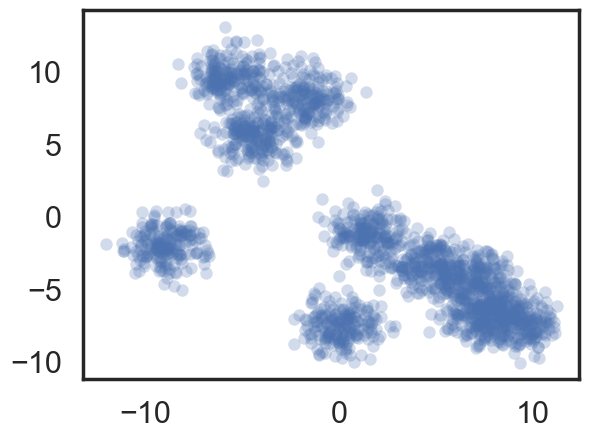

In [14]:
# Visualización de datos
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha': 0.25, 's': 80, 'linewidths': 0}
plt.scatter(blobs[:, 0], blobs[:, 1], c='b', **plot_kwds)

In [15]:
# Ajustamos el modelo HDBSCAN a los datos
clusterer.fit(blobs)

HDBSCAN(gen_min_span_tree=True)

<Axes: ylabel='$\\lambda$ value'>

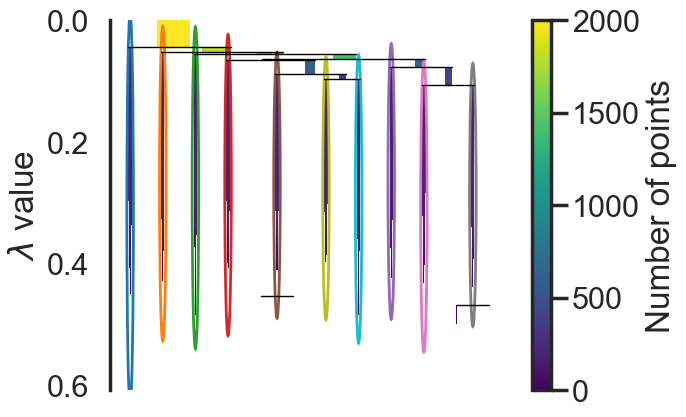

In [16]:
# Visualización de los resultados de la agrupación
pd.DataFrame(blobs).head()
clusterer.labels_
pd.crosstab(clusterer.labels_, columns='count')
clusterer.probabilities_

clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

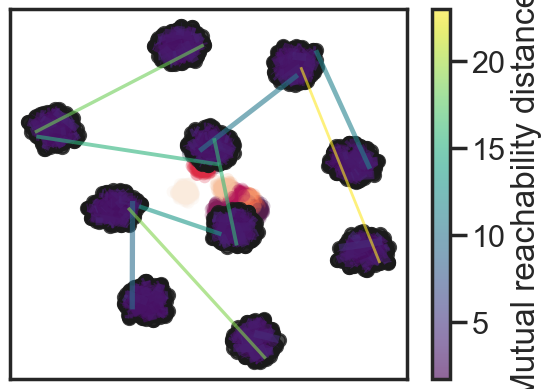

In [17]:

# Visualización de los clusters
plot_kwds = {'alpha': 0.25, 's': 80, 'linewidths': 0}
plt.scatter(blobs[:, 0], blobs[:, 1], c=clusterer.labels_, **plot_kwds)
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis', edge_alpha=0.6, node_size=80, edge_linewidth=2)

plt.show()  # Mostramos los gráficos

In [18]:
# Analizamos el sentimiento promedio de un conjunto de textos.
def sentiment_analysis(texts):
    sentiments = [TextBlob(text).sentiment.polarity for text in texts]
    average_sentiment = sum(sentiments) / len(sentiments)
    return average_sentiment

In [19]:
# Realizamos un análisis de temas específicos (en este caso, basados en los factores DISC) en un conjunto de textos.
def topic_analysis(texts):
    # Palabras clave para identificar diferentes temas o roles basadas en los factores DISC
    disc_keywords = {
        'D': ['combate', 'liderazgo', 'desafío', 'estrategia', 'competencia'],
        'I': ['diálogo', 'colaboración', 'amistad', 'negociación', 'influencia'],
        'S': ['aventura', 'camaradería', 'tradición', 'familia', 'hogar'],
        'C': ['estrategia', 'misión', 'disciplina', 'objetivos', 'responsabilidad']
    }
    
    # Obtenemos todas las palabras clave asociadas a los factores DISC
    temas_comunes = [keyword for keywords in disc_keywords.values() for keyword in keywords]
    
    # Inicializamos el diccionario para almacenar los temas encontrados y sus frecuencias
    temas_encontrados = {}
    
    # Contamos la frecuencia de las palabras clave en los textos
    for tema in temas_comunes:
        temas_encontrados[tema] = sum(text.lower().count(tema) for text in texts)
    
    return temas_encontrados

In [20]:
# Itera sobre los clusters encontrados, calcula el vector promedio de los tokens en el cluster, y realiza análisis de palabras comunes, sentimientos y temas específicos.
# Luego, para cada cluster, obtiene los índices de los elementos pertenecientes a ese cluster y los imprime.
# Además, verifica si hay índices fuera de rango y los imprime.
# Luego, calcula el vector promedio para los tokens en ese cluster, si es posible.
# Realiza análisis de palabras más comunes, análisis de sentimientos y análisis de temas específicos en ese cluster.
for cluster_id in np.unique(clusterer.labels_):
    cluster_indices = np.where(clusterer.labels_ == cluster_id)[0]
    print("Cluster ID:", cluster_id)
    print("Cluster Indices:", cluster_indices)
    
    invalid_indices = [idx for idx in cluster_indices if idx >= len(tokensrol)]
    print("Invalid Indices:", invalid_indices)
    
    # Filtra los tokens que están dentro del rango válido y calcula el vector promedio para el cluster.
    cluster_tokens = [tokensrol[idx] for idx in cluster_indices if idx < len(tokensrol)]
    cluster_vector = get_average_vector(cluster_tokens, rol2vec)
    
    if cluster_vector is not None:
        # Realiza un análisis de las palabras más comunes en el cluster.
        cluster_words = [word for tokens in cluster_tokens for word in tokens]
        word_freq = nltk.FreqDist(cluster_words)
        common_words = word_freq.most_common(10)
        print(f"Cluster {cluster_id} - Palabras más comunes: {common_words}")
        
        # Realiza un análisis de sentimientos para los tokens en el cluster.
        sentiment = sentiment_analysis([" ".join(tokens) for tokens in cluster_tokens])
        print(f"Cluster {cluster_id} - Sentimiento promedio: {sentiment}")
        
        # Realiza un análisis de temas específicos en los tokens del cluster.
        temas = topic_analysis([" ".join(tokens) for tokens in cluster_tokens])
        print(f"Cluster {cluster_id} - Temas identificados: {temas}")
    else:
        print(f"No se pudo calcular el vector promedio para el Cluster {cluster_id}.")

Cluster ID: 0
Cluster Indices: [   2    7   15   17   21   33   38   49   51   52   53   56   58   65
   79   92   96   98  122  129  131  148  152  155  178  183  184  185
  193  196  208  209  214  219  220  230  240  267  272  292  304  309
  327  329  346  358  380  384  398  407  409  412  417  419  427  430
  438  445  452  454  456  468  477  484  495  522  537  561  594  612
  615  619  643  648  672  686  697  705  713  733  777  785  787  810
  811  813  824  835  841  845  850  854  864  868  873  875  877  881
  886  932  936  953  977  978 1006 1016 1041 1065 1077 1092 1094 1099
 1101 1112 1132 1165 1166 1180 1190 1194 1206 1214 1216 1218 1230 1249
 1250 1251 1254 1282 1303 1314 1327 1348 1357 1367 1370 1377 1390 1412
 1419 1424 1444 1456 1475 1479 1483 1493 1510 1534 1551 1556 1557 1558
 1562 1567 1574 1592 1613 1616 1618 1622 1631 1636 1644 1669 1690 1735
 1737 1740 1743 1759 1767 1768 1794 1805 1806 1818 1824 1827 1828 1838
 1856 1863 1866 1870 1871 1877 1893 1894 1895 

In [21]:
# Palabras más comunes por cluster
for cluster_id in np.unique(clusterer.labels_):
    cluster_indices = np.where(clusterer.labels_ == cluster_id)[0]
    cluster_tokens = [tokensrol[idx] for idx in cluster_indices if idx < len(tokensrol)]
    cluster_words = [word for tokens in cluster_tokens for word in tokens]
    word_freq = nltk.FreqDist(cluster_words)
    common_words = word_freq.most_common(10)
    print(f"Cluster {cluster_id} - Palabras más comunes: {common_words}")

Cluster 0 - Palabras más comunes: [('bosque', 18), ('consejo', 13), ('bien', 11), ('negro', 11), ('ahora', 8), ('tiempo', 8), ('aqui', 8), ('dice', 8), ('siempre', 7), ('guerra', 7)]
Cluster 1 - Palabras más comunes: [('bien', 10), ('gente', 8), ('camino', 7), ('lugar', 7), ('alli', 7), ('ahora', 6), ('aqui', 6), ('momento', 5), ('ser', 5), ('sino', 5)]
Cluster 2 - Palabras más comunes: [('consejo', 11), ('parece', 8), ('solo', 7), ('seguro', 6), ('parte', 6), ('bien', 6), ('aqui', 6), ('pequeno', 6), ('resto', 5), ('vida', 5)]
Cluster 3 - Palabras más comunes: [('lugar', 9), ('enanos', 8), ('bien', 7), ('hueste', 7), ('guerra', 6), ('despues', 6), ('justa', 6), ('principe', 6), ('mejor', 6), ('parece', 6)]
Cluster 4 - Palabras más comunes: [('bosque', 7), ('hueste', 6), ('enanos', 5), ('justa', 5), ('intento', 5), ('solo', 5), ('tiempo', 4), ('parece', 4), ('templo', 4), ('buena', 4)]
Cluster 5 - Palabras más comunes: [('gnoma', 7), ('enano', 7), ('egipto', 7), ('bien', 6), ('tiempo',

In [22]:
# Sentimiento promedio por cluster
for cluster_id in np.unique(clusterer.labels_):
    cluster_indices = np.where(clusterer.labels_ == cluster_id)[0]
    cluster_tokens = [tokensrol[idx] for idx in cluster_indices if idx < len(tokensrol)]
    sentiment = sentiment_analysis([" ".join(tokens) for tokens in cluster_tokens])
    print(f"Cluster {cluster_id} - Sentimiento promedio: {sentiment}")

Cluster 0 - Sentimiento promedio: -0.052556818181818184
Cluster 1 - Sentimiento promedio: -0.024242424242424242
Cluster 2 - Sentimiento promedio: -0.0025974025974025983
Cluster 3 - Sentimiento promedio: 0.0
Cluster 4 - Sentimiento promedio: 0.026442307692307692
Cluster 5 - Sentimiento promedio: -0.05135135135135135
Cluster 6 - Sentimiento promedio: 0.026000000000000002
Cluster 7 - Sentimiento promedio: -0.0296875
Cluster 8 - Sentimiento promedio: -0.010606060606060608
Cluster 9 - Sentimiento promedio: -0.044444444444444446


In [23]:
# Temas identificados por cluster
for cluster_id in np.unique(clusterer.labels_):
    cluster_indices = np.where(clusterer.labels_ == cluster_id)[0]
    cluster_tokens = [tokensrol[idx] for idx in cluster_indices if idx < len(tokensrol)]
    temas = topic_analysis([" ".join(tokens) for tokens in cluster_tokens])
    print(f"Cluster {cluster_id} - Temas identificados: {temas}")

Cluster 0 - Temas identificados: {'combate': 0, 'liderazgo': 0, 'desafío': 0, 'estrategia': 1, 'competencia': 0, 'diálogo': 0, 'colaboración': 0, 'amistad': 0, 'negociación': 0, 'influencia': 0, 'aventura': 0, 'camaradería': 0, 'tradición': 0, 'familia': 1, 'hogar': 1, 'misión': 0, 'disciplina': 1, 'objetivos': 0, 'responsabilidad': 0}
Cluster 1 - Temas identificados: {'combate': 0, 'liderazgo': 0, 'desafío': 0, 'estrategia': 1, 'competencia': 0, 'diálogo': 0, 'colaboración': 0, 'amistad': 0, 'negociación': 0, 'influencia': 0, 'aventura': 0, 'camaradería': 0, 'tradición': 0, 'familia': 1, 'hogar': 2, 'misión': 0, 'disciplina': 0, 'objetivos': 0, 'responsabilidad': 0}
Cluster 2 - Temas identificados: {'combate': 2, 'liderazgo': 0, 'desafío': 0, 'estrategia': 0, 'competencia': 0, 'diálogo': 0, 'colaboración': 0, 'amistad': 0, 'negociación': 0, 'influencia': 0, 'aventura': 0, 'camaradería': 0, 'tradición': 0, 'familia': 0, 'hogar': 0, 'misión': 0, 'disciplina': 1, 'objetivos': 0, 'respons

In [24]:
# Asigna etiquetas de cluster
unique_labels = np.unique(clusterer.labels_)
for i, label in enumerate(unique_labels):
    clusterer.labels_[clusterer.labels_ == label] = i